#Why Feature Scaling Matters in Machine Learning

##Step 1: Preparing Your Environment

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

##Step 2: Loading and Exploring the Dataset


In [2]:
# Load the Kaggle Loan Approval Prediction Dataset

!curl -L -o ./loan-approval-prediction-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/architsharma01/loan-approval-prediction-dataset
!unzip -o loan-approval-prediction-dataset.zip
df = pd.read_csv('loan_approval_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check data types and missing values
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 82535  100 82535    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k
Archive:  loan-approval-prediction-dataset.zip
  inflating: loan_approval_dataset.csv  
Dataset Shape: (4269, 13)

First 5 rows:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      2990000

##Step 3: Preprocessing the Dataset


In [3]:
# Select only numerical features for scaling demonstration
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable from features
if 'loan_status' in numerical_features:
    numerical_features.remove('loan_status')

# Create a dataframe with only numerical features
data_numerical = df[numerical_features].copy()

# Check the range of values for numerical features
print("Range of values for numerical features:")
for feature in numerical_features:
    min_val = data_numerical[feature].min()
    max_val = data_numerical[feature].max()
    mean_val = data_numerical[feature].mean()
    print(f"{feature}: Min={min_val}, Max={max_val}, Mean={mean_val}")

Range of values for numerical features:
loan_id: Min=1, Max=4269, Mean=2135.0
 no_of_dependents: Min=0, Max=5, Mean=2.4987116420707425
 income_annum: Min=200000, Max=9900000, Mean=5059123.9166081045
 loan_amount: Min=300000, Max=39500000, Mean=15133450.456781447
 loan_term: Min=2, Max=20, Mean=10.900445069102835
 cibil_score: Min=300, Max=900, Mean=599.9360505973295
 residential_assets_value: Min=-100000, Max=29100000, Mean=7472616.537830873
 commercial_assets_value: Min=0, Max=19400000, Mean=4973155.3056922
 luxury_assets_value: Min=300000, Max=39200000, Mean=15126305.926446475
 bank_asset_value: Min=0, Max=14700000, Mean=4976692.433825252


##Step 4: Visualizing the Effect of Unscaled Features

<Figure size 1200x800 with 0 Axes>

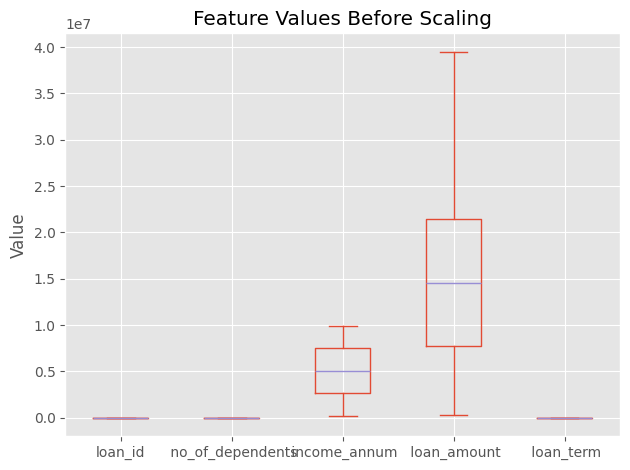

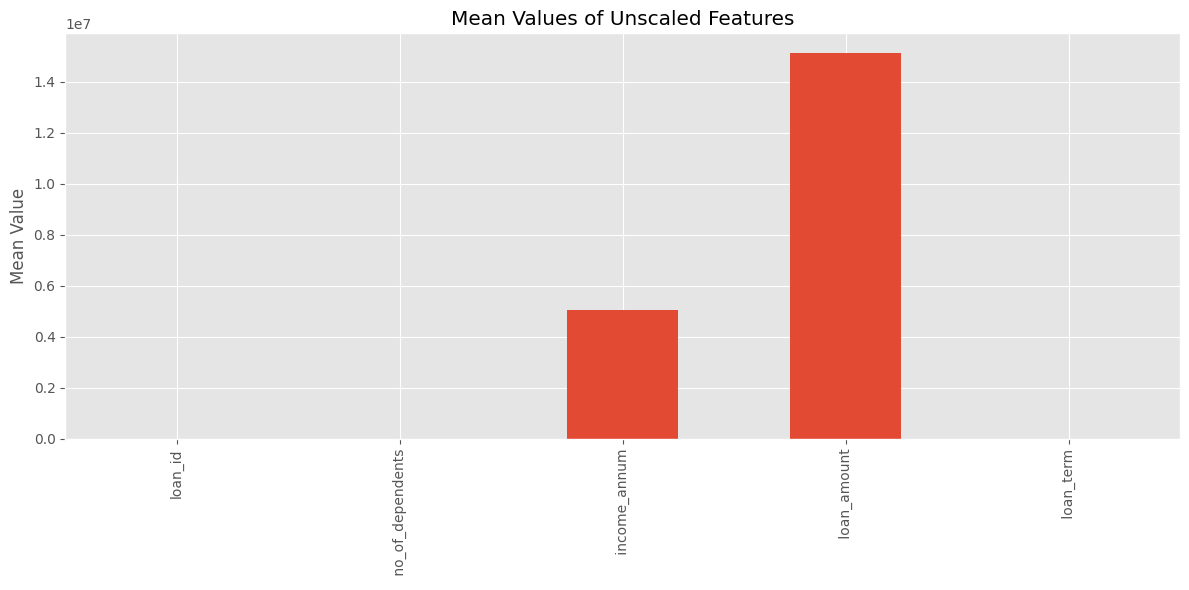

In [4]:
# Create a subplot for the first few numerical features
plt.figure(figsize=(12, 8))

# Select a subset of features for visualization
visualization_features = numerical_features[:5]  # First 5 numerical features
data_to_plot = data_numerical[visualization_features]

# Plot unscaled features
ax = data_to_plot.plot(kind='box')
plt.title('Feature Values Before Scaling')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Create a bar plot for mean values to highlight scale differences
plt.figure(figsize=(12, 6))
mean_values = data_to_plot.mean()
mean_values.plot(kind='bar')
plt.title('Mean Values of Unscaled Features')
plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

## Step 5: Implementing Feature Scaling




In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler # Added import for RobustScaler and MaxAbsScaler
import ipywidgets as widgets
from IPython.display import display, clear_output


# Create a function to apply different scaling methods
def apply_scaling(data, method='Standard'):
    """Apply various scaling methods to the data"""
    if method == 'Standard':
        scaler = StandardScaler()
    elif method == 'MinMax':
        scaler = MinMaxScaler()
    elif method == 'Robust':
        scaler = RobustScaler()
    elif method == 'MaxAbs':
        scaler = MaxAbsScaler()
    else:  # No scaling
        return data.copy()

    scaled_data = scaler.fit_transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index) # Preserve index

# Pre-compute scaled versions for performance (only if data_numerical is not empty)
if numerical_features:
    data_standard = apply_scaling(data_numerical, 'Standard')
    data_minmax = apply_scaling(data_numerical, 'MinMax')
    data_robust = apply_scaling(data_numerical, 'Robust')
    data_maxabs = apply_scaling(data_numerical, 'MaxAbs')
else:
    # Create empty dataframes or handle appropriately if no numerical features
    data_standard, data_minmax, data_robust, data_maxabs = (pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame())


def show_scaling_statistics(method_name):
    """Display statistics and visualizations for the selected scaling method"""
    clear_output(wait=True) # Clears the output of the cell

    # Ensure visualization_features is defined and not empty
    if not visualization_features:
        print("No features selected for visualization. Cannot display statistics.")
        return

    global data_numerical, data_standard, data_minmax, data_robust, data_maxabs # Ensure they are accessible

    data_to_show = pd.DataFrame() # Initialize to avoid UnboundLocalError if no numerical features
    title_suffix = ""

    if method_name == 'Original':
        # Check if data_numerical itself is empty or visualization_features are not in its columns
        if data_numerical.empty or not all(feat in data_numerical.columns for feat in visualization_features):
            print("Original data for visualization is not available or features are missing.")
            return
        data_to_show = data_numerical[visualization_features]
        title_suffix = "Original Unscaled Data"
    elif method_name == 'Standard':
        if data_standard.empty or not all(feat in data_standard.columns for feat in visualization_features):
            print("Standard scaled data for visualization is not available or features are missing.")
            return
        data_to_show = data_standard[visualization_features]
        title_suffix = "StandardScaler (Mean ≈ 0, Std ≈ 1)"
    elif method_name == 'MinMax':
        if data_minmax.empty or not all(feat in data_minmax.columns for feat in visualization_features):
            print("MinMax scaled data for visualization is not available or features are missing.")
            return
        data_to_show = data_minmax[visualization_features]
        title_suffix = "MinMaxScaler (Range [0,1])"
    elif method_name == 'Robust':
        if data_robust.empty or not all(feat in data_robust.columns for feat in visualization_features):
            print("Robust scaled data for visualization is not available or features are missing.")
            return
        data_to_show = data_robust[visualization_features]
        title_suffix = "RobustScaler (Using IQR)"
    elif method_name == 'MaxAbs': # MaxAbs
        if data_maxabs.empty or not all(feat in data_maxabs.columns for feat in visualization_features):
            print("MaxAbs scaled data for visualization is not available or features are missing.")
            return
        data_to_show = data_maxabs[visualization_features]
        title_suffix = "MaxAbsScaler (Range [-1,1] or [0,1])"
    else:
        print(f"Unknown scaling method: {method_name}")
        return

    print(f"\nStatistical Summary of {title_suffix} (Selected Features):")
    print(data_to_show.describe())

    # Create visualizations
    # Use plt.subplots() to get fig and an array of axes
    fig, axes = plt.subplots(2, 1, figsize=(15, 12)) # Increased height a bit

    # Box plot on the first subplot (axes[0])
    data_to_show.plot(kind='box', ax=axes[0])
    axes[0].set_title(f'Feature Distribution with {title_suffix}')
    axes[0].set_ylabel('Value')

    # Bar plot for mean values on the second subplot (axes[1])
    data_to_show.mean().plot(kind='bar', ax=axes[1])
    axes[1].set_title(f'Mean Values with {title_suffix}')
    axes[1].set_ylabel('Mean Value')
    axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels for readability
    if method_name == 'Standard' or method_name == 'Robust':
        axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.7, linewidth=1.5) # Make line more visible

    plt.tight_layout(pad=2.0) # Add some padding
    plt.show()

# Create a dropdown widget for selecting scaling method
scaling_method_widget = widgets.Dropdown(
    options=['Original', 'Standard', 'MinMax', 'Robust', 'MaxAbs'],
    value='Original',
    description='Scaling Method:',
    style={'description_width': 'initial'}
)

# Link the widget to the display function
output_area = widgets.Output() # Renamed for clarity
display(scaling_method_widget, output_area)

# Define the update function
def on_scaling_method_change(change): # Renamed for clarity
    with output_area: # Use the named output area
        if change['type'] == 'change' and change['name'] == 'value':
            show_scaling_statistics(change['new'])

# Register the callback
scaling_method_widget.observe(on_scaling_method_change, names='value')

# Initial display
with output_area: # Use the named output area
    # Check if visualization_features is populated before initial call
    if visualization_features:
        show_scaling_statistics('Original')
    else:
        print("Skipping initial display as no features are selected for visualization.")

Dropdown(description='Scaling Method:', options=('Original', 'Standard', 'MinMax', 'Robust', 'MaxAbs'), style=…

Output()

##Step 6: Interactive Feature Comparison


In [6]:
# #added during screencast
def compare_feature_scaling(feature_name):
    """Compare how a single feature is transformed by different scaling methods"""
    clear_output(wait=True)

    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    # Original data
    sns.histplot(data_numerical[feature_name], kde=True, ax=axes[0])
    axes[0].set_title(f'Original\n{feature_name}')

    # StandardScaler
    sns.histplot(data_standard[feature_name], kde=True, ax=axes[1])
    axes[1].set_title(f'StandardScaler\n{feature_name}')

    # MinMaxScaler
    sns.histplot(data_minmax[feature_name], kde=True, ax=axes[2])
    axes[2].set_title(f'MinMaxScaler\n{feature_name}')

    # RobustScaler
    sns.histplot(data_robust[feature_name], kde=True, ax=axes[3])
    axes[3].set_title(f'RobustScaler\n{feature_name}')

    # MaxAbsScaler
    sns.histplot(data_maxabs[feature_name], kde=True, ax=axes[4])
    axes[4].set_title(f'MaxAbsScaler\n{feature_name}')

    plt.tight_layout()
    plt.show()

    # Print statistics
    stats_df = pd.DataFrame({
        'Original': data_numerical[feature_name].describe(),
        'Standard': data_standard[feature_name].describe(),
        'MinMax': data_minmax[feature_name].describe(),
        'Robust': data_robust[feature_name].describe(),
        'MaxAbs': data_maxabs[feature_name].describe()
    })

    print(f"\nStatistics for feature: {feature_name}")
    print(stats_df)

# Create a dropdown widget for selecting features to compare
feature_widget = widgets.Dropdown(
    options=numerical_features,
    value=numerical_features[0],
    description='Select Feature:',
    style={'description_width': 'initial'}
)

# Link the widget to the display function
feature_output = widgets.Output()
display(feature_widget, feature_output)

# Define the update function
def on_feature_change(change):
    with feature_output:
        if change['type'] == 'change' and change['name'] == 'value':
            compare_feature_scaling(change['new'])

# Register the callback
feature_widget.observe(on_feature_change, names='value')

# Initial display
with feature_output:
    compare_feature_scaling(numerical_features[0])
# #added during screencast

Dropdown(description='Select Feature:', options=('loan_id', ' no_of_dependents', ' income_annum', ' loan_amoun…

Output()

##Step 7: Interactive Feature Relationship Comparison


In [7]:
# #added during screencast
def compare_feature_relationship(feature1, feature2):
    """Compare how relationships between two features change with different scaling methods"""
    clear_output(wait=True)

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    # Set common suptitle
    plt.suptitle(f'Relationship between {feature1} and {feature2} with Different Scaling Methods',
                 fontsize=16, y=1.05)

    # Original data
    axes[0].scatter(data_numerical[feature1], data_numerical[feature2], alpha=0.6)
    axes[0].set_title('Original')

    # StandardScaler
    axes[1].scatter(data_standard[feature1], data_standard[feature2], alpha=0.6)
    axes[1].set_title('StandardScaler')

    # MinMaxScaler
    axes[2].scatter(data_minmax[feature1], data_minmax[feature2], alpha=0.6)
    axes[2].set_title('MinMaxScaler')

    # RobustScaler
    axes[3].scatter(data_robust[feature1], data_robust[feature2], alpha=0.6)
    axes[3].set_title('RobustScaler')

    # MaxAbsScaler
    axes[4].scatter(data_maxabs[feature1], data_maxabs[feature2], alpha=0.6)
    axes[4].set_title('MaxAbsScaler')

    # Set axis labels for all subplots
    for ax in axes:
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)

    plt.tight_layout()
    plt.show()

    # Calculate correlation for each version
    corr_original = data_numerical[[feature1, feature2]].corr().iloc[0, 1]
    corr_standard = data_standard[[feature1, feature2]].corr().iloc[0, 1]
    corr_minmax = data_minmax[[feature1, feature2]].corr().iloc[0, 1]
    corr_robust = data_robust[[feature1, feature2]].corr().iloc[0, 1]
    corr_maxabs = data_maxabs[[feature1, feature2]].corr().iloc[0, 1]

    print(f"Correlation between {feature1} and {feature2}:")
    print(f"Original data: {corr_original:.4f}")
    print(f"Standard scaled: {corr_standard:.4f}")
    print(f"MinMax scaled: {corr_minmax:.4f}")
    print(f"Robust scaled: {corr_robust:.4f}")
    print(f"MaxAbs scaled: {corr_maxabs:.4f}")
    print("\nNotice that correlation remains the same across all scaling methods!")
    print("This is because scaling is a linear transformation that preserves relationships.")

# Create dropdown widgets for selecting features to compare
feature1_widget = widgets.Dropdown(
    options=numerical_features,
    value=numerical_features[0],
    description='Feature 1:',
    style={'description_width': 'initial'}
)

feature2_widget = widgets.Dropdown(
    options=numerical_features,
    value=numerical_features[1] if len(numerical_features) > 1 else numerical_features[0],
    description='Feature 2:',
    style={'description_width': 'initial'}
)

# Create a container for the widgets
feature_selectors = widgets.HBox([feature1_widget, feature2_widget])

# Link the widgets to the display function
relationship_output = widgets.Output()
display(feature_selectors, relationship_output)

# Define the update function
def on_relationship_change(change):
    with relationship_output:
        compare_feature_relationship(feature1_widget.value, feature2_widget.value)

# Register the callbacks
feature1_widget.observe(on_relationship_change, names='value')
feature2_widget.observe(on_relationship_change, names='value')

# Initial display
with relationship_output:
    compare_feature_relationship(feature1_widget.value, feature2_widget.value)
# #added during screencast

Output()